In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

C:\Users\Helen\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Helen\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Helen\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Helen\anaconda3\envs\PythonData\lib\site-packages

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

Features: APPLICATION_TYPE, AFFILIATION, USE_CASE, ORGANIZATION, INCOME_AMT, ASK_AMT

Target: IS_SUCCESSFUL

Remove: EIN, NAME, CLASSIFICATION, STATUS, SPECIAL_CONSIDERATIONS

In [2]:
charity_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Drop columns
charity_df = charity_df.drop(columns=['NAME', 'CLASSIFICATION', 'STATUS', 'SPECIAL_CONSIDERATIONS'], axis = 1)
charity_df.head()

EIN APPLICATION_TYPE       AFFILIATION      USE_CASE  ORGANIZATION  \
0  10520599              T10       Independent    ProductDev   Association   
1  10531628               T3       Independent  Preservation  Co-operative   
2  10547893               T5  CompanySponsored    ProductDev   Association   
3  10553066               T3  CompanySponsored  Preservation         Trust   
4  10556103               T3       Independent     Heathcare         Trust   

      INCOME_AMT  ASK_AMT  IS_SUCCESSFUL  
0              0     5000              1  
1         1-9999   108590              1  
2              0     5000              0  
3    10000-24999     6692              1  
4  100000-499999   142590              1

In [4]:
# Check for null values
charity_df.isnull().sum()

EIN                 0
APPLICATION_TYPE    0
AFFILIATION         0
USE_CASE            0
ORGANIZATION        0
INCOME_AMT          0
ASK_AMT             0
IS_SUCCESSFUL       0
dtype: int64

In [5]:
# Print out the Country value counts
ask_amt_counts = charity_df.ASK_AMT.value_counts()
ask_amt_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

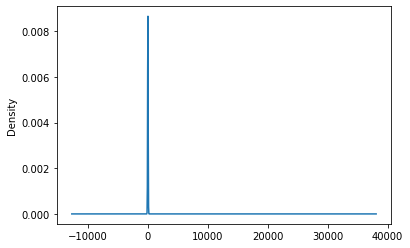

In [6]:
# Visualize the value counts
ask_amt_counts.plot.density()


In [7]:
# Check dtypes
charity_df.dtypes

# bin for ask_amt (so we can use it in ai model)

EIN                  int64
APPLICATION_TYPE    object
AFFILIATION         object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [9]:
# Generate our categorical variable list

charity_cat = ['APPLICATION_TYPE', 'AFFILIATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT']

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
charity_df_copy = pd.DataFrame(charity_df)

# do one-hotencoding for each column (independent variables)

for cat in charity_cat:
    
    # Fit and transform the OneHotEncoder using the categorical variable list
    encode_df = pd.DataFrame(enc.fit_transform(charity_df[[cat]]))

    # Add the encoded variable names to the DataFrame
    encode_df.columns = enc.get_feature_names([cat])
    
    # merge all the encoded columns back one data frame
    charity_df_copy = pd.concat([charity_df_copy.reset_index(drop=True), encode_df.reset_index(drop=True)], axis=1)
    
# Drop original columns
charity_df_copy = charity_df_copy.drop(charity_cat, 1)

charity_df_copy.head()



EIN  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_T10  \
0  10520599     5000              1                   1.0   
1  10531628   108590              1                   0.0   
2  10547893     5000              0                   0.0   
3  10553066     6692              1                   0.0   
4  10556103   142590              1                   0.0   

   APPLICATION_TYPE_T12  APPLICATION_TYPE_T13  APPLICATION_TYPE_T14  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   APPLICATION_TYPE_T15  APPLICATION_TYPE_T17  APPLICATION_TYPE_T19  ...  \
0                   0.0                   0.0                   0.0  ...   
1                   0.0                   0.0                   0.0  ...   
2                   0.0                   0.0                   0.0  ...   
3                   0.0                   0.0                   0.0  ...   
4                   0.0                   0.0                   0.0  ...   

   ORGANIZATION_Trust  INCOME_AMT_0  INCOME_AMT_1-9999  \
0                 0.0           1.0                0.0   
1                 0.0           0.0                1.0   
2                 0.0           1.0                0.0   
3                 1.0           0.0                0.0   
4                 1.0           0.0                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 44 columns]

In [14]:
# Check the number of unique values in each column
charity_df_copy.nunique()

EIN                             34299
ASK_AMT                          8747
IS_SUCCESSFUL                       2
APPLICATION_TYPE_T10                2
APPLICATION_TYPE_T12                2
APPLICATION_TYPE_T13                2
APPLICATION_TYPE_T14                2
APPLICATION_TYPE_T15                2
APPLICATION_TYPE_T17                2
APPLICATION_TYPE_T19                2
APPLICATION_TYPE_T2                 2
APPLICATION_TYPE_T25                2
APPLICATION_TYPE_T29                2
APPLICATION_TYPE_T3                 2
APPLICATION_TYPE_T4                 2
APPLICATION_TYPE_T5                 2
APPLICATION_TYPE_T6                 2
APPLICATION_TYPE_T7                 2
APPLICATION_TYPE_T8                 2
APPLICATION_TYPE_T9                 2
AFFILIATION_CompanySponsored        2
AFFILIATION_Family/Parent           2
AFFILIATION_Independent             2
AFFILIATION_National                2
AFFILIATION_Other                   2
AFFILIATION_Regional                2
USE_CASE_Com

In [15]:
# Split our preprocessed data into our features and target arrays
y = charity_df_copy["IS_SUCCESSFUL"].values
X = charity_df_copy.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
